In [3]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X+ np.random.randn(m, 1)

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

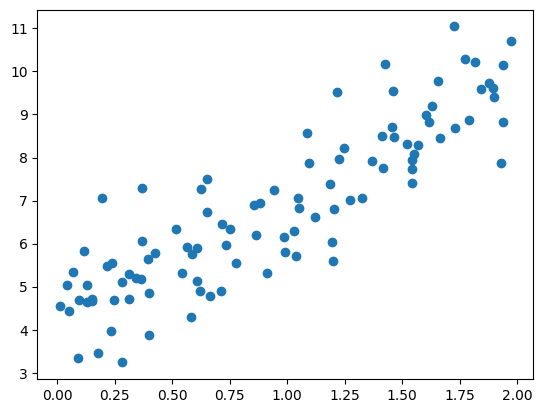

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot()
plt.show()

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


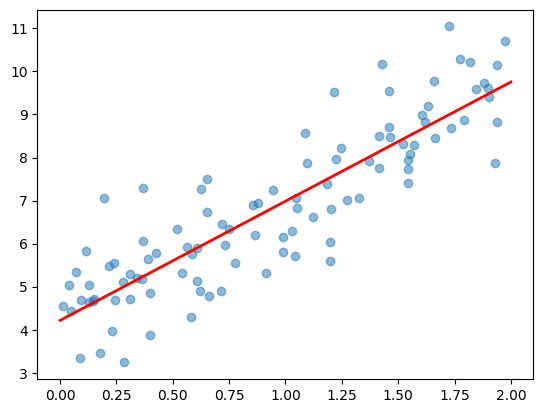

In [7]:
import matplotlib.pyplot as plt

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
print(X_new)
print(X_new_b)
y_pred = X_new_b @ theta_best

plt.scatter(X, y, alpha=0.5)
plt.plot(X_new, y_pred, "r-", linewidth=2)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

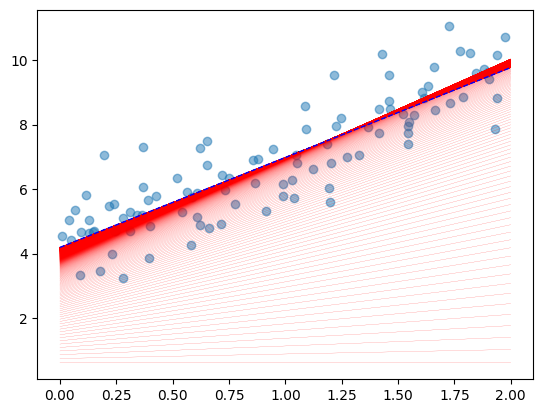

In [21]:
eta = 0.01
n_epochs = 1000
m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2, 1)
plt.scatter(X, y, alpha=0.5)
for epoch in range(n_epochs):
    gradients = (2 / m) * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    y_pred = X_new_b @ theta
    plt.plot(X_new, y_pred, "r-", linewidth=0.1)
plt.plot(X_new, y_pred, "b--", linewidth=1)
plt.show()

/var/folders/n4/8zh_hhf525v6v_00z9234_0h0000gn/T/ipykernel_44362/1482364883.py:16: RuntimeWarning: overflow encountered in matmul
  gradients = 2 * X_b.T @ (X_b @ theta - y)
/var/folders/n4/8zh_hhf525v6v_00z9234_0h0000gn/T/ipykernel_44362/1482364883.py:19: RuntimeWarning: invalid value encountered in matmul
  y_pred = X_new_b @ theta
/var/folders/n4/8zh_hhf525v6v_00z9234_0h0000gn/T/ipykernel_44362/1482364883.py:18: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


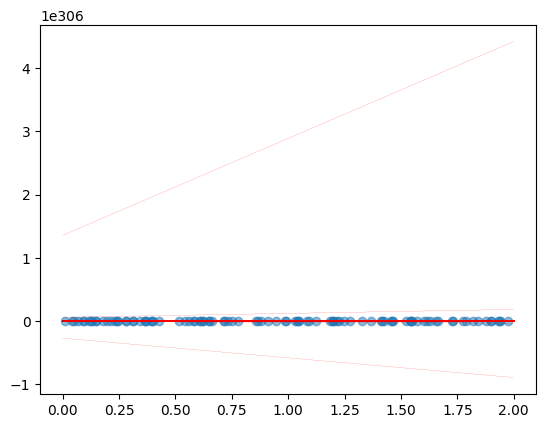

In [22]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)
plt.scatter(X, y, alpha=0.5)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * X_b.T @ (X_b @ theta - y)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        y_pred = X_new_b @ theta
        plt.plot(X_new, y_pred, "r-", linewidth=0.1)
plt.plot(X_new, y_pred, "b--", linewidth=1)
plt.show()